# <h1><center><b>Nettoyage de données<b></center></h1>

## <h2>1. Importation des modules</h2>

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from joblib import Parallel, delayed

## <h2>2. Préparation d'affichage du dataset </h2>

In [97]:
pd.set_option("display.max_rows", 5000)
pd.set_option("display.max_column", 170)
pd.set_option("display.max_colwidth", 100)
pd.set_option('display.max_info_columns', 170)

## <h2>3. Affichage du dataset</h2>

On import le dataset avec pandas avec comme paramètre:
<li>Une séparation par tabulation</li>
<li>Une encodage en UTF8</li>
<li>Utilisation de la mémoire moins économe (problème sur les colonnes 0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48 qui ont plusieurs types)</li>

In [98]:
df = pd.read_csv('./Dataset/fr.openfoodfacts.org.products.csv', sep='\t', encoding='utf-8', low_memory=False)
df

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000000003087/farine-de-ble-noir-ferme-t-y-r-nao,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-completed, en:ingredients-to-be-completed, en:expir...","en:to-be-completed,en:nutrition-facts-to-be-completed,en:ingredients-to-be-completed,en:expirati...","A compléter,Informations nutritionnelles à compléter,Ingrédients à compléter,Date limite à compl...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000000004530/banana-chips-sweetened-whole,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN

In [99]:
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000000003087/farine-de-ble-noir-ferme-t-y-r-nao,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-completed, en:ingredients-to-be-completed, en:expir...","en:to-be-completed,en:nutrition-facts-to-be-completed,en:ingredients-to-be-completed,en:expirati...","A compléter,Informations nutritionnelles à compléter,Ingrédients à compléter,Date limite à compl...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000000004530/banana-chips-sweetened-whole,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN

In [100]:
df.shape

(320772, 162)

Il y a 320772 lignes et 162 colonnes

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Data columns (total 162 columns):
 #    Column                                      Non-Null Count   Dtype  
---   ------                                      --------------   -----  
 0    code                                        320749 non-null  object 
 1    url                                         320749 non-null  object 
 2    creator                                     320770 non-null  object 
 3    created_t                                   320769 non-null  object 
 4    created_datetime                            320763 non-null  object 
 5    last_modified_t                             320772 non-null  object 
 6    last_modified_datetime                      320772 non-null  object 
 7    product_name                                303010 non-null  object 
 8    generic_name                                52795 non-null   object 
 9    quantity                                    104819 non-nu

In [102]:
print(df['nutrition-score-fr_100g'].unique())

[ nan  14.   0.  12.   7.  -6.  15.  11.   9.  16.  19.  -1.   6.  26.
  13.  10.  17.  22.  23.  30.   8.  25.  -2.   1.   2.  18.  21.  20.
   3.   4.  24.  27.  28.  -3.  -4.  -7.  -5.   5.  29.  31.  -8.  -9.
  35.  33.  32.  34. -10.  40.  37.  38. -11.  36. -13. -12. -14. -15.]


On réalise qu'il y a des colonnes qui possède peu ou aucune valeur et des produits qui ne possèdent pas de code-barre

## <h2>4. Nettoyage</h2>

### Part 1:

In [103]:
print(df.duplicated().sum())
print(df.duplicated(subset='code').sum())
df.drop_duplicates(subset='code', inplace=True)

0
22


On supprime toute les valeurs en doubles

In [104]:
df = df.drop(columns=df.columns[df.isnull().all()])

On a supprimé les colonnes où il n'y a pas de données

In [105]:
df = df.dropna(subset=['code'])
df = df.dropna(subset=['countries_fr'])
nbr = df['code'].count()
r = df.notna().sum() * 100 / nbr
r = r.round(2)
print(r)

code                                          100.00
url                                           100.00
creator                                       100.00
created_t                                     100.00
created_datetime                              100.00
last_modified_t                               100.00
last_modified_datetime                        100.00
product_name                                   94.47
generic_name                                   16.44
quantity                                       32.64
packaging                                      24.60
packaging_tags                                 24.60
brands                                         91.17
brands_tags                                    91.17
categories                                     26.29
categories_tags                                26.29
categories_fr                                  26.29
origins                                         6.91
origins_tags                                  

On a calculé le taux de remplissage par colonne

In [106]:
columns_drop = r[(r <= 40) & (r.index != 'categories_fr')].index
df = df.drop(columns=columns_drop)

Tous ceux qui ont le taux de remplissage inférieur à 40 % sont listées dans "columns_drop" puis supprimer

In [107]:
df.shape

(320469, 43)

On a plus que 42 colonnes

In [108]:
df = df.drop(columns=['nutrition-score-uk_100g', 'last_modified_datetime', 'last_modified_t','trans-fat_100g', 'created_datetime', 'created_t', 'creator', 'additives_fr'])

On supprime les colonnes qu'on va pas utiliser 

In [109]:
df.head()

,code,url,product_name,brands,brands_tags,categories_fr,countries,countries_tags,countries_fr,ingredients_text,serving_size,additives_n,additives,additives_tags,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,states,states_tags,states_fr,energy_100g,fat_100g,saturated-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000000003087/farine-de-ble-noir-ferme-t-y-r-nao,Farine de blé noir,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-completed, en:ingredients-to-be-completed, en:expir...","en:to-be-completed,en:nutrition-facts-to-be-completed,en:ingredients-to-be-completed,en:expirati...","A compléter,Informations nutritionnelles à compléter,Ingrédients à compléter,Date limite à compl...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000000004530/banana-chips-sweetened-whole,Banana Chips Sweetened (Whole),NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil and/or palm oil) sugar, natural banana flavor.",28 g (1 ONZ),0.0,[ bananas -> en:bananas ] [ vegetable-oil -> en:vegetable-oil ] [ oil -> en:oil ] [ cocon...,NaN,0.0,0.0,d,"en:to-be-completed, en:nutrition-facts-completed, en:ingredients-completed, en:expiration-date-t...","en:to-be-completed,en:nutrition-facts-completed,en:ingredients-completed,en:expiration-date-to-b...","A compléter,Informations nutritionnelles complétées,Ingrédients complétés,Date limite à compléte...",2243.0,28.57,28.57,0.018,64.29,14.29,3.6,3.57,0.00000,0.000,0.0,0.0214,0.000,0.00129,14.0
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000000004559/peanuts-torn-glasser,Peanuts,Torn & Glasser,torn-glasser,NaN,US,en:united-states,États-Unis,"Peanuts, wheat flour, sugar, rice flour, tapioca starch, salt, leavening (ammonium bicarbonate, ...",28 g (0.25 cup),0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> en:wheat-flour ] [ flour -> en:flour ] [ sugar...,NaN,0.0,0.0,b,"en:to-be-completed, en:nutrition-facts-completed, en:ingredients-completed, en:expiration-date-t...","en:to-be-completed,en:nutrition-facts-completed,en:ingredients-completed,en:expiration-date-to-b...","A compléter,Informations nutritionnelles complétées,Ingrédients complétés,Date limite à compléte...",1941.0,17.86,0.00,0.000,60.71,17.86,7.1,17.86,0.63500,0.250,0.0,0.0000,0.071,0.00129,0.0
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000000016087/organic-salted-nut-mix-grizzlies,Organic Salted Nut Mix,Grizzlies,grizzlies,NaN,US,en:united-states,États-Unis,"Organic hazelnuts, organic cashews, organic walnuts almonds, organic sunflower oil, sea salt.",28 g (0.25 cup),0.0,[ organic-hazelnuts -> en:organic-hazelnuts ] [ hazelnuts -> en:hazelnuts ] [ organic-cashe...,NaN,0.0,0.0,d,"en:to-be-completed, en:nutrition-facts-completed, en:ingredients-completed, en:expiration-date-t...","en:to-be-completed,en:nutrition-facts-completed,en:ingredients-completed,en:expiration-date-to-b...","A compléter,Informations nutritionnelles complétées,Ingrédients complétés,Date limite à compléte...",2540.0,57.14,5.36,NaN,17.86,3.57,7.1,17.86,1.22428,0.482,NaN,NaN,0.143,0.00514,12.0
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000000016094/organic-polenta-bob-s-red-mill,Organic Polenta,Bob's Red Mill,bob-s-red-mill,NaN,US,en:united-states,États-Unis,Organic polenta,35 g (0.25 cup),0.0,[ organic-polenta -> en:organic-polenta ] [ polenta -> en:polenta ],NaN,0.0,0.0,NaN,"en:to-be-completed, en:nutrition-facts-completed, en:ingredients-completed, en:expiration-date-t...","en:to-be-completed,en:nutrition-facts-completed,en:ingredients-completed,en:expiration-date-to-b...","A compléter,Informations nutritionnelles co

In [110]:
df.shape

(320469, 35)

In [111]:
df = df.drop(columns=['brands', 'brands_tags', 'countries', 'countries_tags', 'countries_fr', 'additives_tags', 'additives', 'ingredients_text', 'serving_size', 'ingredients_that_may_be_from_palm_oil_n', 'ingredients_from_palm_oil_n', 'states_tags', 'states_fr', 'states'])

Les colonnes qu'on va pas utiisés sont supprimés

In [112]:
print("Nombre de lignes et de colonnes :")
print(df.shape)
print()
print("Liste des colonnes qu'on va traiter :")
print(df.columns)

Nombre de lignes et de colonnes :
(320469, 21)

Liste des colonnes qu'on va traiter :
Index(['code', 'url', 'product_name', 'categories_fr', 'additives_n',
       'nutrition_grade_fr', 'energy_100g', 'fat_100g', 'saturated-fat_100g',
       'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'vitamin-a_100g',
       'vitamin-c_100g', 'calcium_100g', 'iron_100g',
       'nutrition-score-fr_100g'],
      dtype='object')


### Part 2:

In [113]:
nbr = df['code'].count()
r = df.notna().sum() * 100 / nbr
print(r.round(2))

code                       100.00
url                        100.00
product_name                94.47
categories_fr               26.29
additives_n                 77.65
nutrition_grade_fr          69.01
energy_100g                 81.46
fat_100g                    76.08
saturated-fat_100g          71.61
cholesterol_100g            44.96
carbohydrates_100g          75.99
sugars_100g                 76.42
fiber_100g                  62.68
proteins_100g               81.08
salt_100g                   79.71
sodium_100g                 79.70
vitamin-a_100g              42.92
vitamin-c_100g              43.96
calcium_100g                44.01
iron_100g                   43.83
nutrition-score-fr_100g     69.01
dtype: float64


On revoie le taux de remplissage des colonnes restantes

In [114]:
df.loc[df['energy_100g'] > 10000, 'energy_100g'] *= 10**-3

In [115]:
df.loc[df['energy_100g'] < 0, 'energy_100g'] *= -1
df.loc[df['fat_100g'] < 0, 'fat_100g'] *= -1
df.loc[df['saturated-fat_100g'] < 0, 'saturated-fat_100g'] *= -1
df.loc[df['carbohydrates_100g'] < 0, 'carbohydrates_100g'] *= -1
df.loc[df['sugars_100g'] < 0, 'sugars_100g'] *= -1
df.loc[df['fiber_100g'] < 0, 'fiber_100g'] *= -1
df.loc[df['proteins_100g'] < 0, 'proteins_100g'] *= -1
df.loc[df['salt_100g'] < 0, 'salt_100g'] *= -1
df.loc[df['sodium_100g'] < 0, 'sodium_100g'] *= -1
df.loc[df['vitamin-a_100g'] < 0, 'vitamin-a_100g'] *= -1
df.loc[df['vitamin-c_100g'] < 0, 'vitamin-c_100g'] *= -1
df.loc[df['calcium_100g'] < 0, 'calcium_100g'] *= -1
df.loc[df['iron_100g'] < 0, 'iron_100g'] *= -1
df.loc[df['cholesterol_100g'] < 0, 'cholesterol_100g'] *= -1

On considère que les valeurs inférieur à 0 est juste une erreur d'avoir poser un "-" devant la valeur donc on le multiplie par -1 pour le remettre positif

In [116]:
df.loc[df['energy_100g'] > 3000, 'energy_100g'] = np.nan
df.loc[df['fat_100g'] >= 100, 'fat_100g'] = np.nan
df.loc[df['saturated-fat_100g'] >= 50, 'saturated-fat_100g'] = np.nan
df.loc[df['saturated-fat_100g'] > df['fat_100g'], 'saturated-fat_100g'] = np.nan
df.loc[df['carbohydrates_100g'] > 100, 'carbohydrates_100g'] = np.nan
df.loc[df['sugars_100g'] > 100, 'sugars_100g'] = np.nan
df.loc[df['sugars_100g'] > df['carbohydrates_100g'], 'sugars_100g'] = np.nan
df.loc[df['fiber_100g'] >= 50, 'fiber_100g'] = np.nan
df.loc[df['proteins_100g'] >= 95, 'proteins_100g'] = np.nan
df.loc[df['salt_100g'] >= 20, 'salt_100g'] = np.nan
df.loc[df['sodium_100g'] > 8, 'sodium_100g'] = np.nan
df.loc[df['vitamin-a_100g'] > 0.1, 'vitamin-a_100g'] = np.nan
df.loc[df['vitamin-c_100g'] > 0.25, 'vitamin-c_100g'] = np.nan
df.loc[df['calcium_100g'] > 0.25, 'calcium_100g'] = np.nan
df.loc[df['iron_100g'] > 0.015, 'iron_100g'] = np.nan
df.loc[df['cholesterol_100g'] > 3, 'cholesterol_100g'] = np.nan

In [117]:
df.describe()

,additives_n,energy_100g,fat_100g,saturated-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
count,248853.000000,256996.000000,242535.000000,227906.000000,144082.000000,243503.000000,244215.000000,200726.000000,259824.000000,252414.000000,252441.000000,137549.000000,140138.000000,128581.000000,138799.000000,221153.000000
mean,1.936304,1088.359181,12.261160,4.802426,0.018316,32.055427,15.961659,2.790244,7.074246,1.020559,0.404089,0.000159,0.005976,0.048281,0.001554,9.165514
std,2.502216,747.991241,16.350472,6.598643,0.038483,29.141184,21.142355,4.264775,8.126639,1.713009,0.686705,0.000841,0.017985,0.057713,0.002005,9.055968
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000
25%,0.000000,368.000000,0.000000,0.000000,0.000000,6.000000,1.300000,0.000000,0.700000,0.060840,0.024000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,1075.000000,5.000000,1.790000,0.000000,20.600000,5.700000,1.500000,4.760000,0.558800,0.220000,0.000000,0.000000,0.026000,0.000970,10.000000
75%,3.000000,1644.000000,20.000000,7.140000,0.020000,58.330000,24.000000,3.600000,10.000000,1.333500,0.526000,0.000107,0.003400,0.077000,0.002400,16.000000
max,31.000000,3000.000000,99.900000,49.800000,1.580000,100.000000,100.000000,48.950000,94.700000,19.982180,8.000000,0.087000,0.250000,0.250000,0.015000,40.000000


On met nulle les valeurs aberrantes. 

In [118]:
nbr = df['code'].count()
r = df.notna().sum() * 100 / nbr
print(r.round(2))

code                       100.00
url                        100.00
product_name                94.47
categories_fr               26.29
additives_n                 77.65
nutrition_grade_fr          69.01
energy_100g                 80.19
fat_100g                    75.68
saturated-fat_100g          71.12
cholesterol_100g            44.96
carbohydrates_100g          75.98
sugars_100g                 76.21
fiber_100g                  62.64
proteins_100g               81.08
salt_100g                   78.76
sodium_100g                 78.77
vitamin-a_100g              42.92
vitamin-c_100g              43.73
calcium_100g                40.12
iron_100g                   43.31
nutrition-score-fr_100g     69.01
dtype: float64


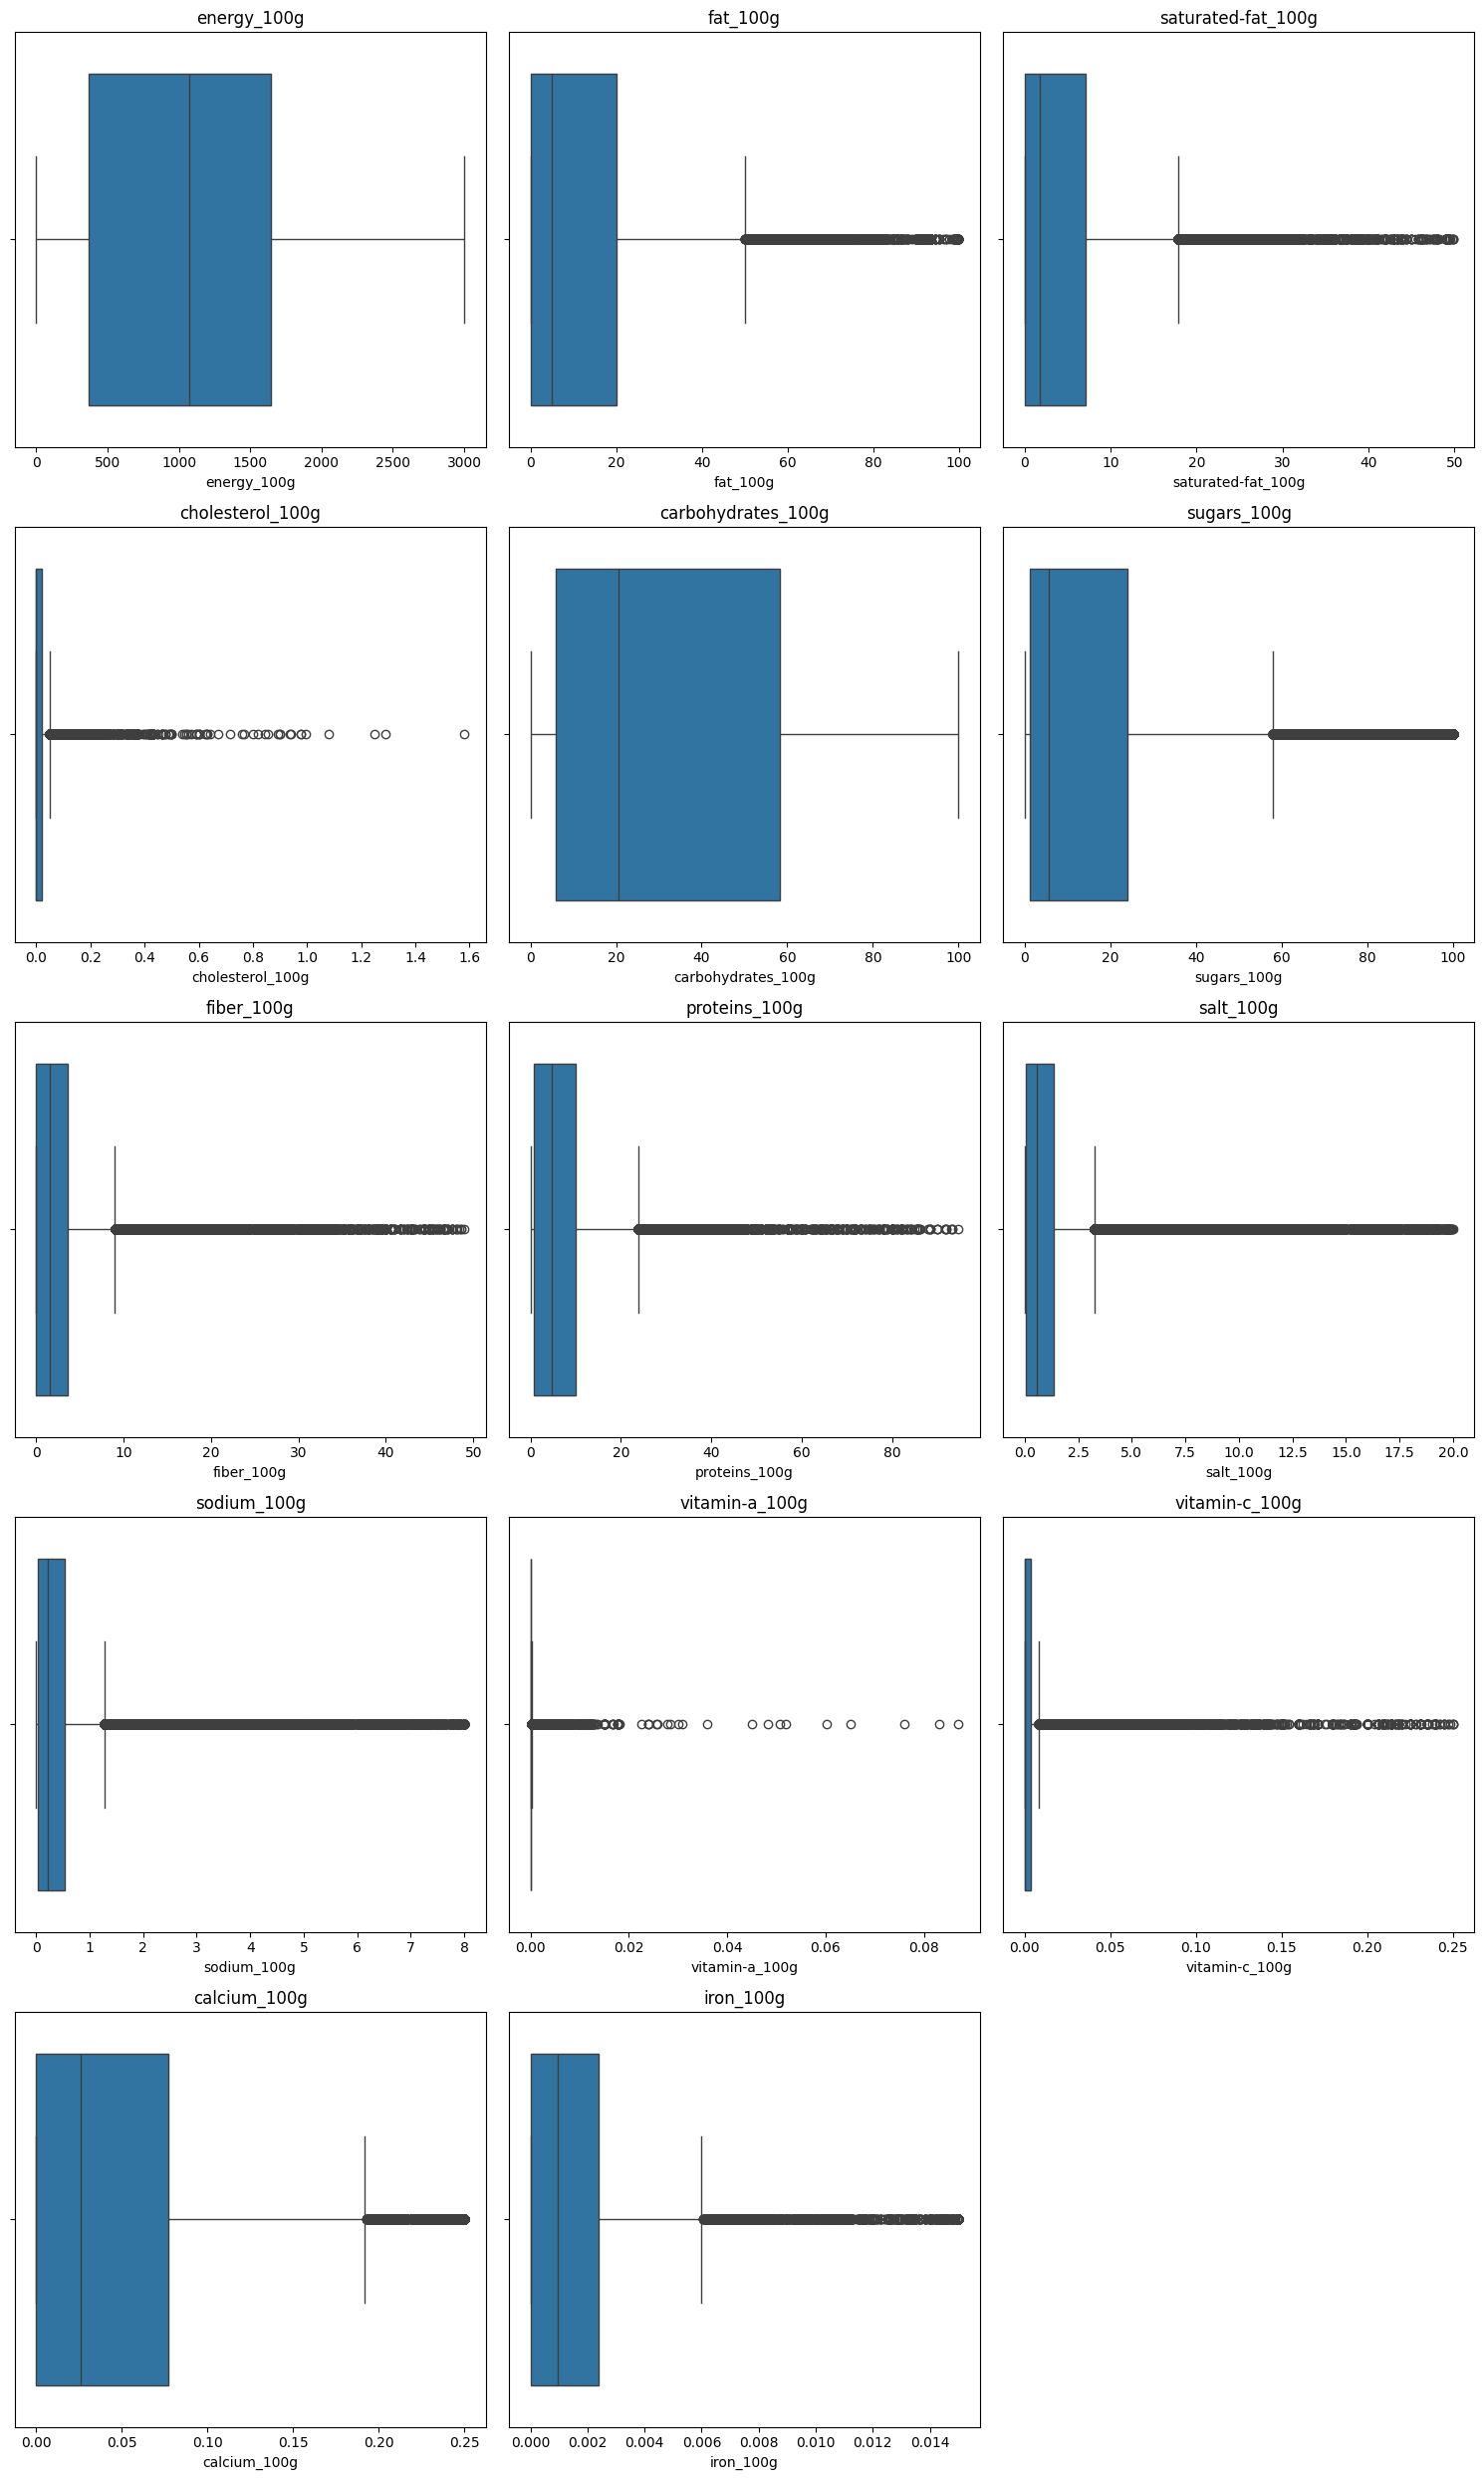

In [119]:
float_columns = df.select_dtypes(include=['float64', 'int64'])
columns_to_plot = [col for col in float_columns.columns if col not in ['additives_n', 'nutrition-score-fr_100g']]

columns_per_row = 3
num_rows = (len(columns_to_plot) + columns_per_row - 1) // columns_per_row  # Calculate number of rows
fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(15, num_rows * 5))
axes = axes.flatten()  # Flatten axes for easy access

for i, column in enumerate(columns_to_plot):
    sns.boxplot(data=df, x=column, ax=axes[i])
    axes[i].set_title(column)

# Hide unused subplots
for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [120]:
df['categories_fr'] = None

Pour categories, on dédcide de tout supprimer etant donner qu'il y a des valeurs aberra,tes et on decide tout remplir en fonction du product_name

### Part 3:

In [121]:
df.describe()

,additives_n,energy_100g,fat_100g,saturated-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
count,248853.000000,256996.000000,242535.000000,227906.000000,144082.000000,243503.000000,244215.000000,200726.000000,259824.000000,252414.000000,252441.000000,137549.000000,140138.000000,128581.000000,138799.000000,221153.000000
mean,1.936304,1088.359181,12.261160,4.802426,0.018316,32.055427,15.961659,2.790244,7.074246,1.020559,0.404089,0.000159,0.005976,0.048281,0.001554,9.165514
std,2.502216,747.991241,16.350472,6.598643,0.038483,29.141184,21.142355,4.264775,8.126639,1.713009,0.686705,0.000841,0.017985,0.057713,0.002005,9.055968
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000
25%,0.000000,368.000000,0.000000,0.000000,0.000000,6.000000,1.300000,0.000000,0.700000,0.060840,0.024000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,1075.000000,5.000000,1.790000,0.000000,20.600000,5.700000,1.500000,4.760000,0.558800,0.220000,0.000000,0.000000,0.026000,0.000970,10.000000
75%,3.000000,1644.000000,20.000000,7.140000,0.020000,58.330000,24.000000,3.600000,10.000000,1.333500,0.526000,0.000107,0.003400,0.077000,0.002400,16.000000
max,31.000000,3000.000000,99.900000,49.800000,1.580000,100.000000,100.000000,48.950000,94.700000,19.982180,8.000000,0.087000,0.250000,0.250000,0.015000,40.000000


In [122]:
float_columns = [col for col in df.select_dtypes(include=['float64']).columns if col != 'nutrition-score-fr_100g']
df = df.dropna(subset=float_columns, how='all')
print(f"Nombre de lignes et colonnes après suppression : {df.shape}")

Nombre de lignes et colonnes après suppression : (276066, 21)


On réalise une supression des lignes 

In [123]:

categories_keywords = {
    'Produits laitiers': ['lait', 'fromage', 'yaourt', 'beurre', 'crème', 'lait entier', 'lait écrémé', 'lait demi-écrémé', 'yaourt nature', 'yaourt aux fruits'],
    'Pâtisserie': ['biscuit', 'croissant', 'gâteau', 'cake', 'tarte', 'pâtisserie'],
    'Viénoiserie': ['viennoiserie', 'brioche', 'pain', 'baguette', 'pain au chocolat', 'chocolatine', 'croissant'],
    'Boissons': ['jus', 'boisson', 'soda', 'eau', 'sans alcool', 'thé', 'café', 'infusion', 'chocolat chaud', 'pepsi', 'coca-cola', 'orangina', 'sprite', 'fanta'],
    'Viandes': ['viande', 'poulet', 'porc', 'bœuf', 'veau', 'agneau', 'canard', 'saucisse', 'charcuterie', 'jambon', 'saucisson'],
    'Fruits et légumes': ['fruit', 'légume', 'pomme', 'carotte', 'banane', 'tomate', 'lentilles', 'haricot', 'salade', 'brocoli', 'épinard', 'poivron', 'courgette', 'aubergine', 'poireaux', 'ail', 'oignon'],
    'Poissons et fruits de mer': ['poisson', 'thon', 'saumon', 'crevette', 'crabe', 'moules', 'calamar'],
    'Féculents': ['riz', 'pâtes', 'céréales', 'quinoa', 'semoule', 'polenta'],
    'Snacks': ['chips', 'snack', 'crackers', 'salted', 'olives', 'salé', 'cacahuète', 'noix', 'amande', 'pistache', 'popcorn'],
    'Sauces et condiments': ['sauce', 'ketchup', 'mayonnaise', 'moutarde', 'vinaigrette', 'salsa', 'vinaigre'],
    'Produits sucrés': ['sucre', 'miel', 'confiture', 'sucré', 'bonbons', 'chocolat', 'caramel', 'Lindt', 'Nutella', 'barre chocolatée'],
    'Boissons alcoolisées': ['alcool', 'vin', 'bière', 'whisky', 'rhum', 'vodka', 'liqueur', 'champagne'],
    'Épices et assaisonnements': ['épices', 'herbes', 'poivre', 'sel', 'curry', 'paprika', 'cannelle', 'basilic', 'thym', 'romarin'],
    'Glaces et desserts': ['glace', 'sorbet', 'crème glacée', 'dessert', 'mousse'],
    'Huiles et matières grasses': ['huile', 'olive', 'tournesol']
}

def assign_category_from_keywords(row):
    categories = str(row['categories_fr']).lower() if pd.notna(row['categories_fr']) else ''
    product_name = str(row['product_name']).lower() if 'product_name' in row and pd.notna(row['product_name']) else ''
    for category, keywords in categories_keywords.items():
        if any(keyword in categories or keyword in product_name for keyword in keywords):
            return category
    return 'Autre'

df['categories_fr'] = df.apply(assign_category_from_keywords, axis=1)

print(df['categories_fr'].value_counts())

categories_fr
Autre                         175155
Fruits et légumes              15779
Produits sucrés                15317
Snacks                         14304
Sauces et condiments           13216
Produits laitiers               8581
Boissons                        7670
Pâtisserie                      5800
Viandes                         4956
Féculents                       3349
Épices et assaisonnements       3016
Huiles et matières grasses      2563
Poissons et fruits de mer       1797
Boissons alcoolisées            1734
Viénoiserie                     1624
Glaces et desserts              1205
Name: count, dtype: int64


On attribue une catégorie à chaque produits et ceux qu'on arrive pas à déterminer facilement sont mis dans autre.

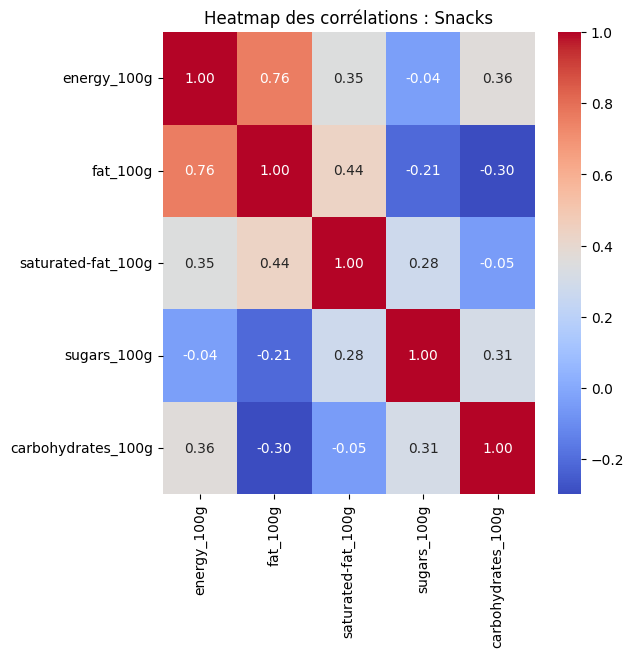

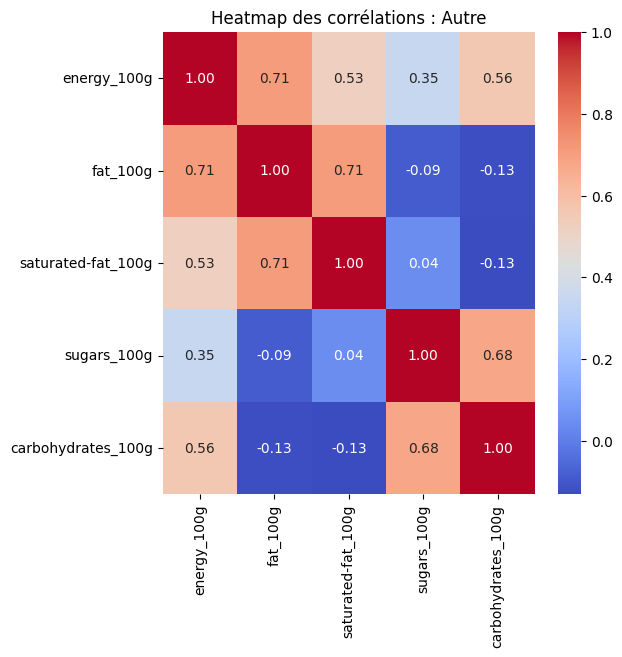

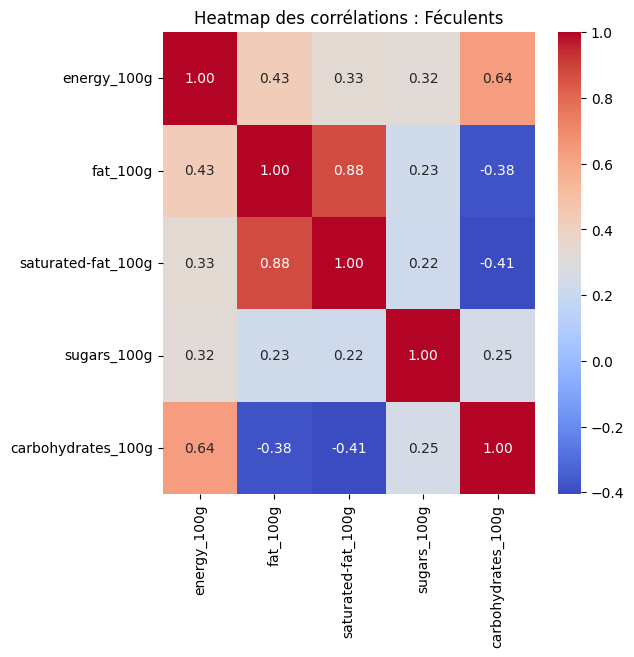

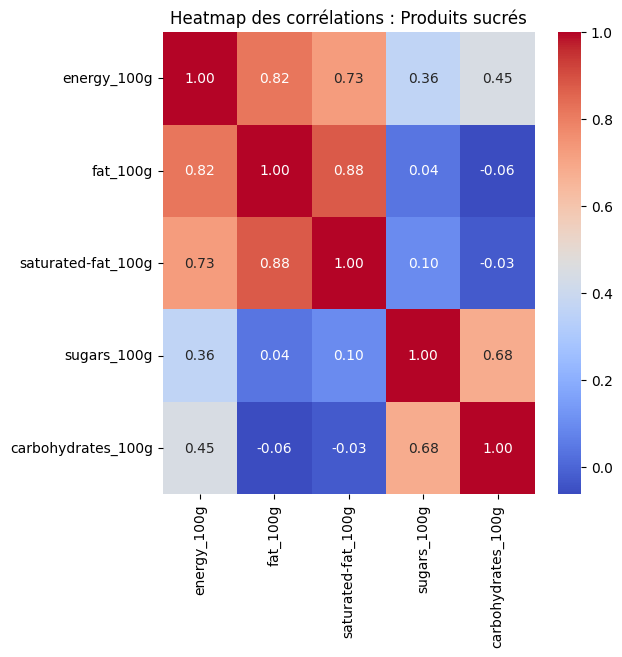

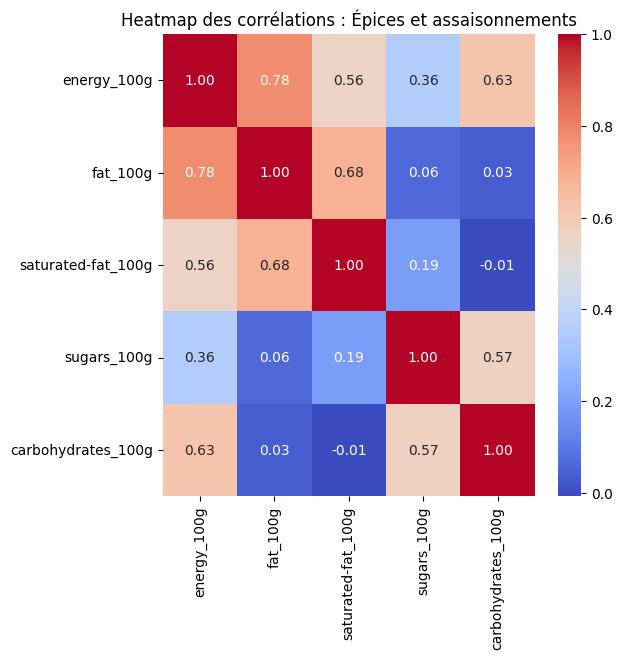

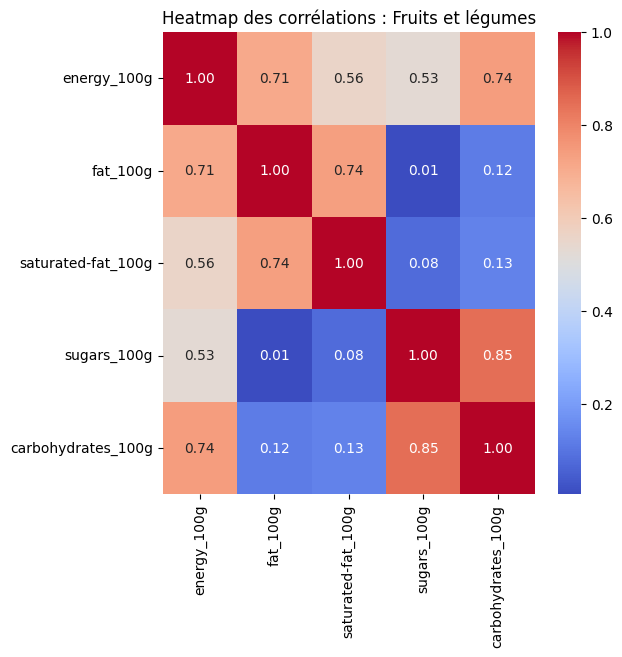

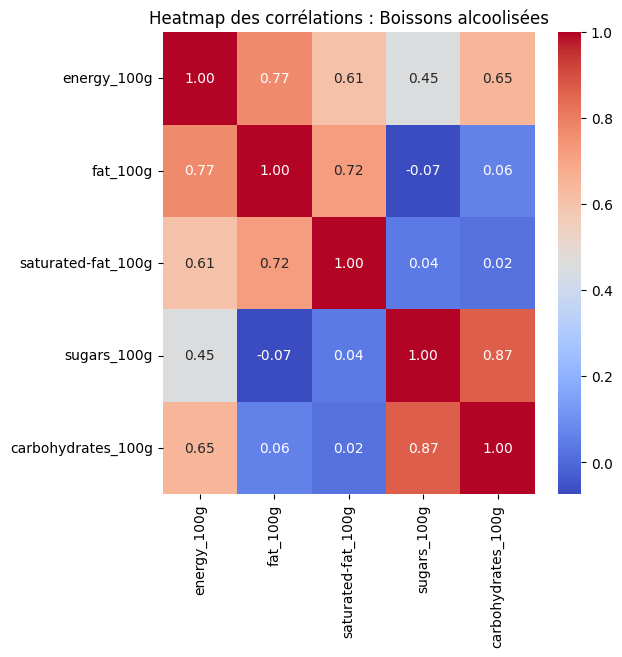

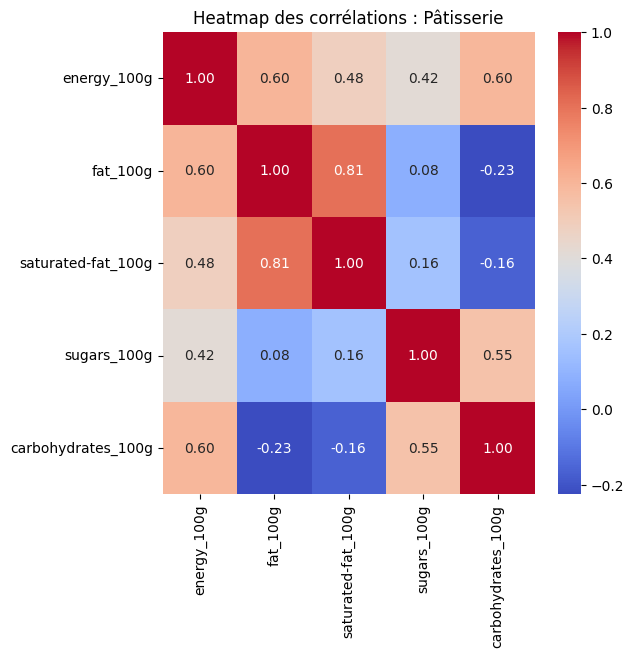

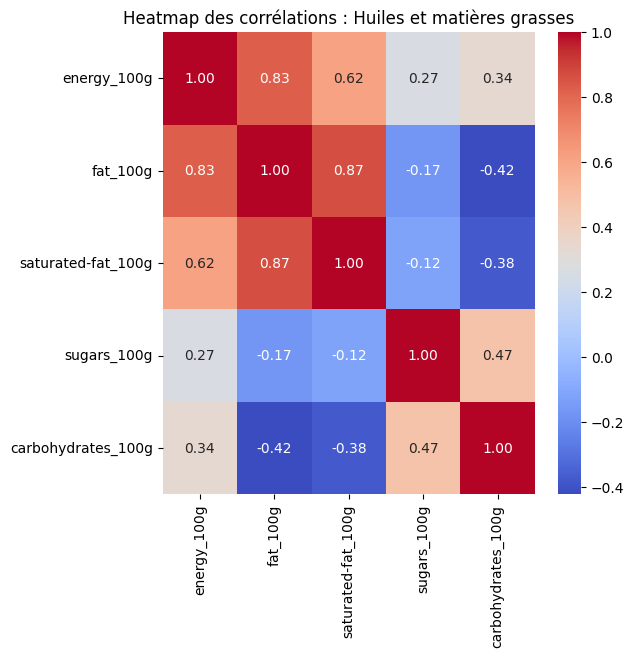

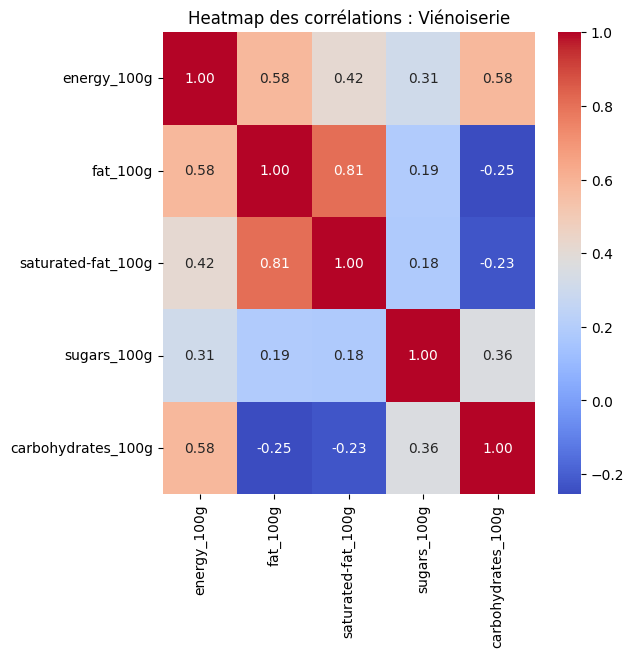

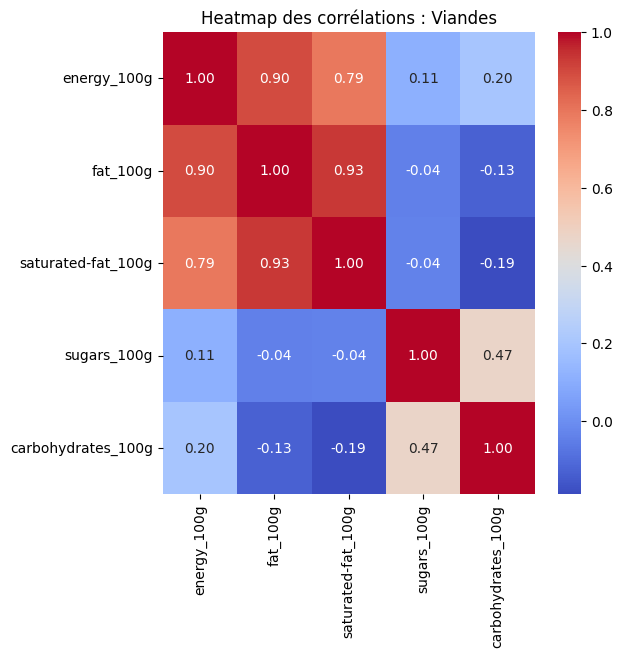

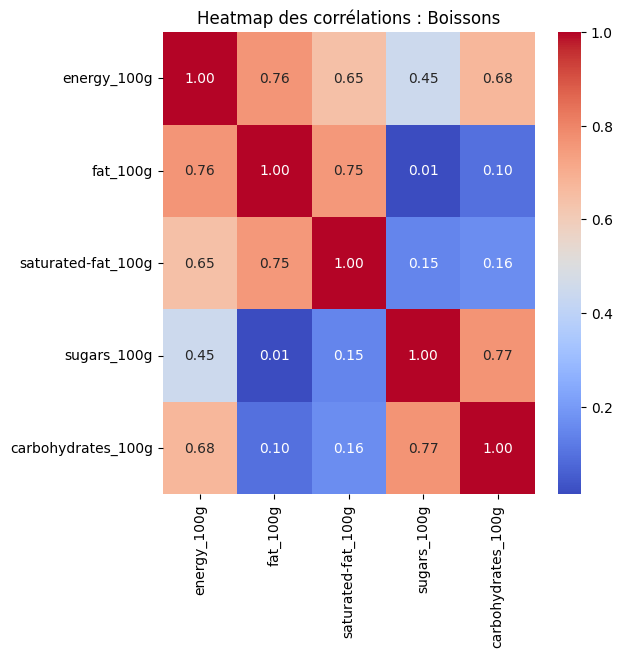

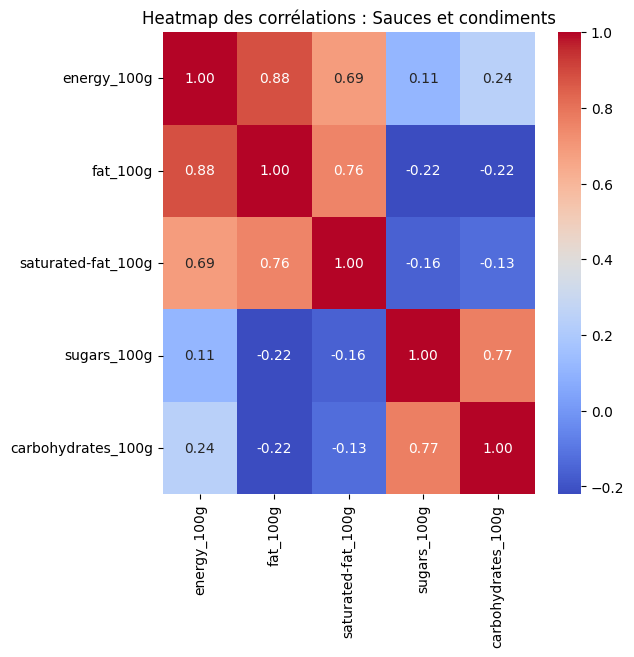

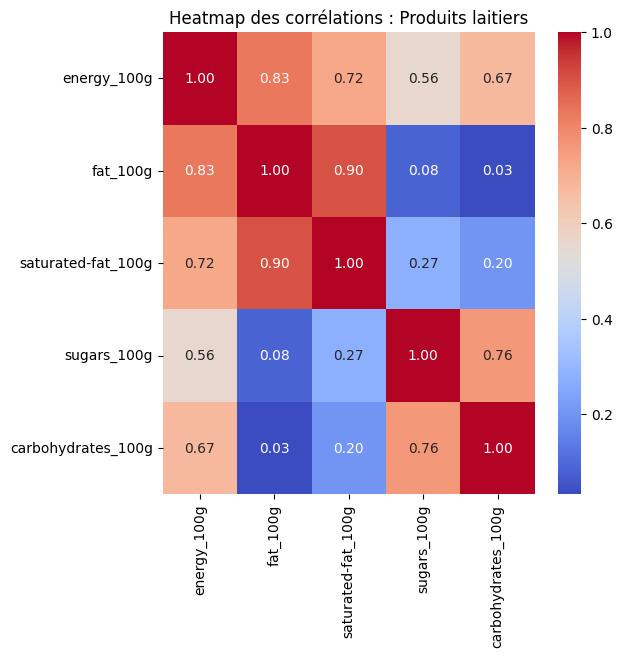

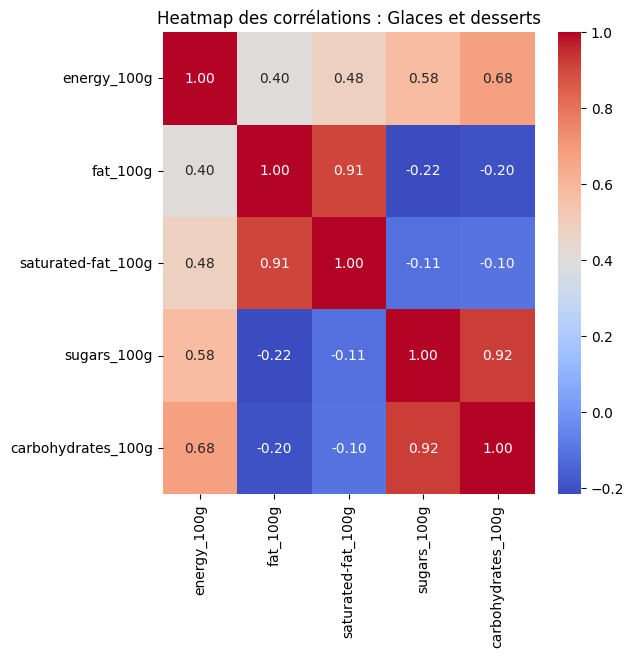

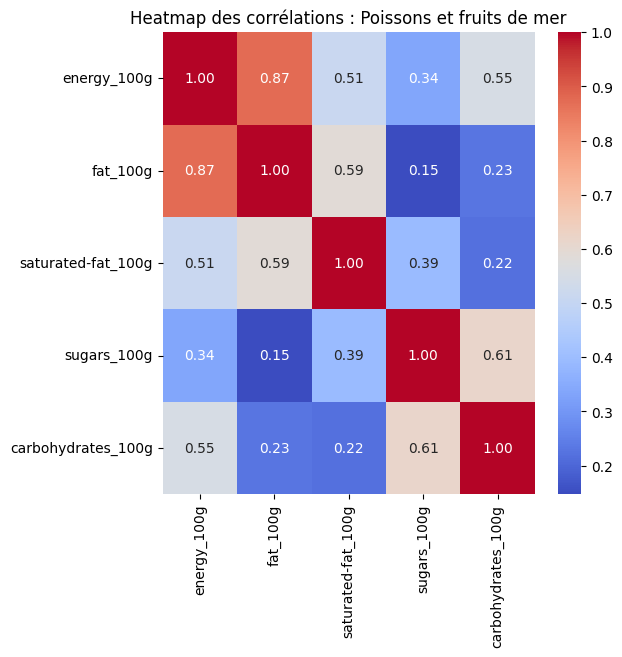

In [124]:
# Liste des colonnes à inclure dans la heatmap
columns_to_analyze = ['energy_100g', 'fat_100g', 'saturated-fat_100g', 'sugars_100g', 'carbohydrates_100g']

# Filtrer les colonnes nécessaires
df_filtered = df[columns_to_analyze + ['categories_fr']]

# Parcourir chaque catégorie unique
for category in df_filtered['categories_fr'].unique():
    # Filtrer les données pour la catégorie actuelle
    category_data = df_filtered[df_filtered['categories_fr'] == category]
    
    # Vérifier qu'il y a suffisamment de données pour calculer une corrélation
    if len(category_data) > 1:  # Au moins 2 lignes nécessaires pour une corrélation
        plt.figure(figsize=(6, 6))
        correlation_matrix = category_data[columns_to_analyze].corr()
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
        plt.title(f'Heatmap des corrélations : {category}')
        plt.show()
    else:
        print(f"Pas assez de données pour la catégorie : {category}")



In [125]:


group_1 = ['energy_100g', 'fat_100g', 'saturated-fat_100g']
group_2 = ['sugars_100g', 'carbohydrates_100g']

# Définir les limites pour chaque groupe
limits_group_1 = {'energy_100g': (0, 3000), 'fat_100g': (0, 100), 'saturated-fat_100g': (0, 50)}
limits_group_2 = {'sugars_100g': (0, 90), 'carbohydrates_100g': (0, 100)}

for category in df['categories_fr'].unique():
    category_data = df[df['categories_fr'] == category]
    if len(category_data) > 1:
        # Imputation pour group_1
        imputer_1 = IterativeImputer(random_state=42)
        imputed_group_1 = imputer_1.fit_transform(category_data[group_1])
        for i, col in enumerate(group_1):
            min_val, max_val = limits_group_1[col]
            imputed_group_1[:, i] = np.clip(imputed_group_1[:, i], min_val, max_val)
        df.loc[df['categories_fr'] == category, group_1] = imputed_group_1

        # Imputation pour group_2
        imputer_2 = IterativeImputer(random_state=42)
        imputed_group_2 = imputer_2.fit_transform(category_data[group_2])
        for i, col in enumerate(group_2):
            min_val, max_val = limits_group_2[col]
            imputed_group_2[:, i] = np.clip(imputed_group_2[:, i], min_val, max_val)
        df.loc[df['categories_fr'] == category, group_2] = imputed_group_2

print(df.isna().sum())

c:\Users\Hoa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\Hoa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\Hoa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


code                            0
url                             0
product_name                 3615
categories_fr                   0
additives_n                 27213
nutrition_grade_fr          54955
energy_100g                     0
fat_100g                        0
saturated-fat_100g              0
cholesterol_100g           131984
carbohydrates_100g              0
sugars_100g                     0
fiber_100g                  75340
proteins_100g               16242
salt_100g                   23652
sodium_100g                 23625
vitamin-a_100g             138517
vitamin-c_100g             135928
calcium_100g               147485
iron_100g                  137267
nutrition-score-fr_100g     54955
dtype: int64


On réalise un interative imputer en fonction du heatmap 
<br>
Le visuel a été réalisé en fonction de la catégorie
<br>
on attribue une condition à l'interative imputer pour éviter de creer des valeurs aberrantes 

In [126]:
df = df[df['categories_fr'] != 'Autre']
print(df['categories_fr'].value_counts())

categories_fr
Fruits et légumes             15779
Produits sucrés               15317
Snacks                        14304
Sauces et condiments          13216
Produits laitiers              8581
Boissons                       7670
Pâtisserie                     5800
Viandes                        4956
Féculents                      3349
Épices et assaisonnements      3016
Huiles et matières grasses     2563
Poissons et fruits de mer      1797
Boissons alcoolisées           1734
Viénoiserie                    1624
Glaces et desserts             1205
Name: count, dtype: int64


On supprime la colonne autre (pas assez de temps pour le traiter complétement)

In [127]:
# Identifier les colonnes de type float, en excluant certaines colonnes spécifiques
exclude_columns = ['nutrition-score-fr_100g', 'additives_n', 'nutrition-score-fr_100g ']
float_columns = [col for col in df.select_dtypes(include=['float64']).columns if col not in exclude_columns]
columns_to_fill = float_columns

# Supprimer les lignes où toutes les colonnes float sont NaN avant de commencer
df = df.dropna(subset=columns_to_fill, how='all')

def process_category(category):
    category_data = df[df['categories_fr'] == category]
    updates = []  # Liste pour stocker les mises à jour (index, colonne, valeur)
    
    if len(category_data) > 1:
        data_to_cluster = category_data[columns_to_fill]
        
        # Standardiser les données
        scaler = StandardScaler()
        data_scaled = scaler.fit_transform(data_to_cluster.fillna(0))  # Remplir temporairement les NaN par 0
        
        # Appliquer K-Means avec un nombre de clusters limité
        n_clusters = min(3, len(category_data))  
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        clusters = kmeans.fit_predict(data_scaled)
        
        # Remplir les valeurs manquantes par les valeurs des plus proches voisins dans le même cluster
        for cluster in np.unique(clusters):
            cluster_indices = category_data.index[clusters == cluster]
            cluster_data = category_data.loc[cluster_indices, columns_to_fill]
            
            valid_data = cluster_data.dropna()
            if valid_data.empty:
                continue  # Passer ce cluster s'il n'y a pas de données valides
            
            cluster_scaled = scaler.transform(cluster_data.fillna(0))
            
            # Identifier les indices des lignes avec des NaN
            nan_indices = cluster_data[cluster_data.isna().any(axis=1)].index
            
            if len(nan_indices) > 0:
                # Utiliser les plus proches voisins pour remplir les NaN
                knn = NearestNeighbors(n_neighbors=1)
                knn.fit(cluster_scaled[~cluster_data.isna().any(axis=1)])
                
                for idx in nan_indices:
                    row = cluster_scaled[cluster_data.index == idx]
                    _, neighbor_idx = knn.kneighbors(row)
                    neighbor_idx = cluster_data.index[neighbor_idx[0][0]]
                    
                    # Ajouter les mises à jour à la liste
                    for col in columns_to_fill:
                        if pd.isna(df.loc[idx, col]):
                            updates.append((idx, col, df.loc[neighbor_idx, col]))
    return updates

# Exécuter le traitement parallèle
results = Parallel(n_jobs=-1)(delayed(process_category)(category) for category in df['categories_fr'].unique())

# Appliquer les mises à jour au DataFrame principal
for updates in results:
    for idx, col, value in updates:
        df.loc[idx, col] = value

print("Traitement terminé.")

Traitement terminé.


J'ai réaliser du machine learning avec K-Means pour standardiser les données et avec le KNN remplir les valeurs manquantes en se basant sur les clusters 

In [128]:
for category in df['categories_fr'].unique():
    category_data = df[df['categories_fr'] == category]
    medians = category_data[columns_to_fill].median()
    for col in columns_to_fill:
        df.loc[df['categories_fr'] == category, col] = df.loc[df['categories_fr'] == category, col].fillna(medians[col])



Les valeurs manquantes restantes après le traitement ont été remplies par la médiane de chaque catégorie.

In [129]:
df.isna().sum()

code                           0
url                            0
product_name                   0
categories_fr                  0
additives_n                12894
nutrition_grade_fr         18716
energy_100g                    0
fat_100g                       0
saturated-fat_100g             0
cholesterol_100g               0
carbohydrates_100g             0
sugars_100g                    0
fiber_100g                     0
proteins_100g                  0
salt_100g                      0
sodium_100g                    0
vitamin-a_100g                 0
vitamin-c_100g                 0
calcium_100g                   0
iron_100g                      0
nutrition-score-fr_100g    18716
dtype: int64

In [130]:
def calculer_nutriscore(energie_kj, sucres, acides_gras_satures, sodium, 
                       fruits_legumes_noix, fibres, proteines):
    
    # 1. Points négatifs (N)
    
    # Points pour l'énergie (kJ/100g)
    points_energie = 0
    if energie_kj <= 335: points_energie = 0
    elif energie_kj <= 670: points_energie = 1
    elif energie_kj <= 1005: points_energie = 2
    elif energie_kj <= 1340: points_energie = 3
    elif energie_kj <= 1675: points_energie = 4
    elif energie_kj <= 2010: points_energie = 5
    elif energie_kj <= 2345: points_energie = 6
    elif energie_kj <= 2680: points_energie = 7
    elif energie_kj <= 3015: points_energie = 8
    elif energie_kj <= 3350: points_energie = 9
    else: points_energie = 10

    # Points pour les sucres (g/100g)
    points_sucres = 0
    if sucres <= 4.5: points_sucres = 0
    elif sucres <= 9: points_sucres = 1
    elif sucres <= 13.5: points_sucres = 2
    elif sucres <= 18: points_sucres = 3
    elif sucres <= 22.5: points_sucres = 4
    elif sucres <= 27: points_sucres = 5
    elif sucres <= 31: points_sucres = 6
    elif sucres <= 36: points_sucres = 7
    elif sucres <= 40: points_sucres = 8
    elif sucres <= 45: points_sucres = 9
    else: points_sucres = 10

    # Points pour les acides gras saturés (g/100g)
    points_ag_satures = 0
    if acides_gras_satures <= 1: points_ag_satures = 0
    elif acides_gras_satures <= 2: points_ag_satures = 1
    elif acides_gras_satures <= 3: points_ag_satures = 2
    elif acides_gras_satures <= 4: points_ag_satures = 3
    elif acides_gras_satures <= 5: points_ag_satures = 4
    elif acides_gras_satures <= 6: points_ag_satures = 5
    elif acides_gras_satures <= 7: points_ag_satures = 6
    elif acides_gras_satures <= 8: points_ag_satures = 7
    elif acides_gras_satures <= 9: points_ag_satures = 8
    elif acides_gras_satures <= 10: points_ag_satures = 9
    else: points_ag_satures = 10

    # Points pour le sodium (mg/100g)
    points_sodium = 0
    if sodium <= 90: points_sodium = 0
    elif sodium <= 180: points_sodium = 1
    elif sodium <= 270: points_sodium = 2
    elif sodium <= 360: points_sodium = 3
    elif sodium <= 450: points_sodium = 4
    elif sodium <= 540: points_sodium = 5
    elif sodium <= 630: points_sodium = 6
    elif sodium <= 720: points_sodium = 7
    elif sodium <= 810: points_sodium = 8
    elif sodium <= 900: points_sodium = 9
    else: points_sodium = 10

    # 2. Points positifs (P)
    
    # Points pour les fruits, légumes, légumineuses et noix (%)
    points_fruits_legumes = 0
    if fruits_legumes_noix <= 40: points_fruits_legumes = 0
    elif fruits_legumes_noix <= 60: points_fruits_legumes = 1
    elif fruits_legumes_noix <= 80: points_fruits_legumes = 2
    else: points_fruits_legumes = 5  # > 80%

    # Points pour les fibres (g/100g)
    points_fibres = 0
    if fibres <= 0.9: points_fibres = 0
    elif fibres <= 1.9: points_fibres = 1
    elif fibres <= 2.8: points_fibres = 2
    elif fibres <= 3.7: points_fibres = 3
    elif fibres <= 4.7: points_fibres = 4
    else: points_fibres = 5

    # Points pour les protéines (g/100g)
    points_proteines = 0
    if proteines <= 1.6: points_proteines = 0
    elif proteines <= 3.2: points_proteines = 1
    elif proteines <= 4.8: points_proteines = 2
    elif proteines <= 6.4: points_proteines = 3
    elif proteines <= 8.0: points_proteines = 4
    else: points_proteines = 5

    # 3. Calcul du score final
    points_N = points_energie + points_sucres + points_ag_satures + points_sodium
    points_P = points_fruits_legumes + points_fibres + points_proteines

    if points_N >= 11 and points_fruits_legumes < 5:
        score_final = points_N - points_fruits_legumes
    else:
        score_final = points_N - points_P
    return score_final


df['nutrition-score-fr_100g'] = df.apply(
    lambda row: calculer_nutriscore(
        row['energy_100g'], 
        row['sugars_100g'], 
        row['saturated-fat_100g'], 
        row['sodium_100g'], 
        row['vitamin-a_100g'], 
        row['fiber_100g'], 
        row['proteins_100g']
    ), axis=1
)

In [131]:
def application_grade_dataframe(score_final):
    if score_final <= -1: return 'A'
    elif score_final <= 2: return 'B'
    elif score_final <= 10: return 'C'
    elif score_final <= 18: return 'D'
    else: return 'E'

df['nutrition_grade_fr'] = df['nutrition-score-fr_100g'].apply(application_grade_dataframe)
df['nutrition_grade_fr'].value_counts()


nutrition_grade_fr
D    26144
B    22728
A    22082
E    15078
C    14879
Name: count, dtype: int64

On calcule le nutrition score pour chaque produit en utilisant les colonnes pertinentes. et avec le score calculé on attribue un grade à chaque produit.

In [132]:
df['additives_n'] = df['additives_n'].fillna(0)

Dans la colonne 'additives_n', remplacer les valeurs manquantes par 0

In [133]:
df = df.drop(columns=["sodium_100g"])

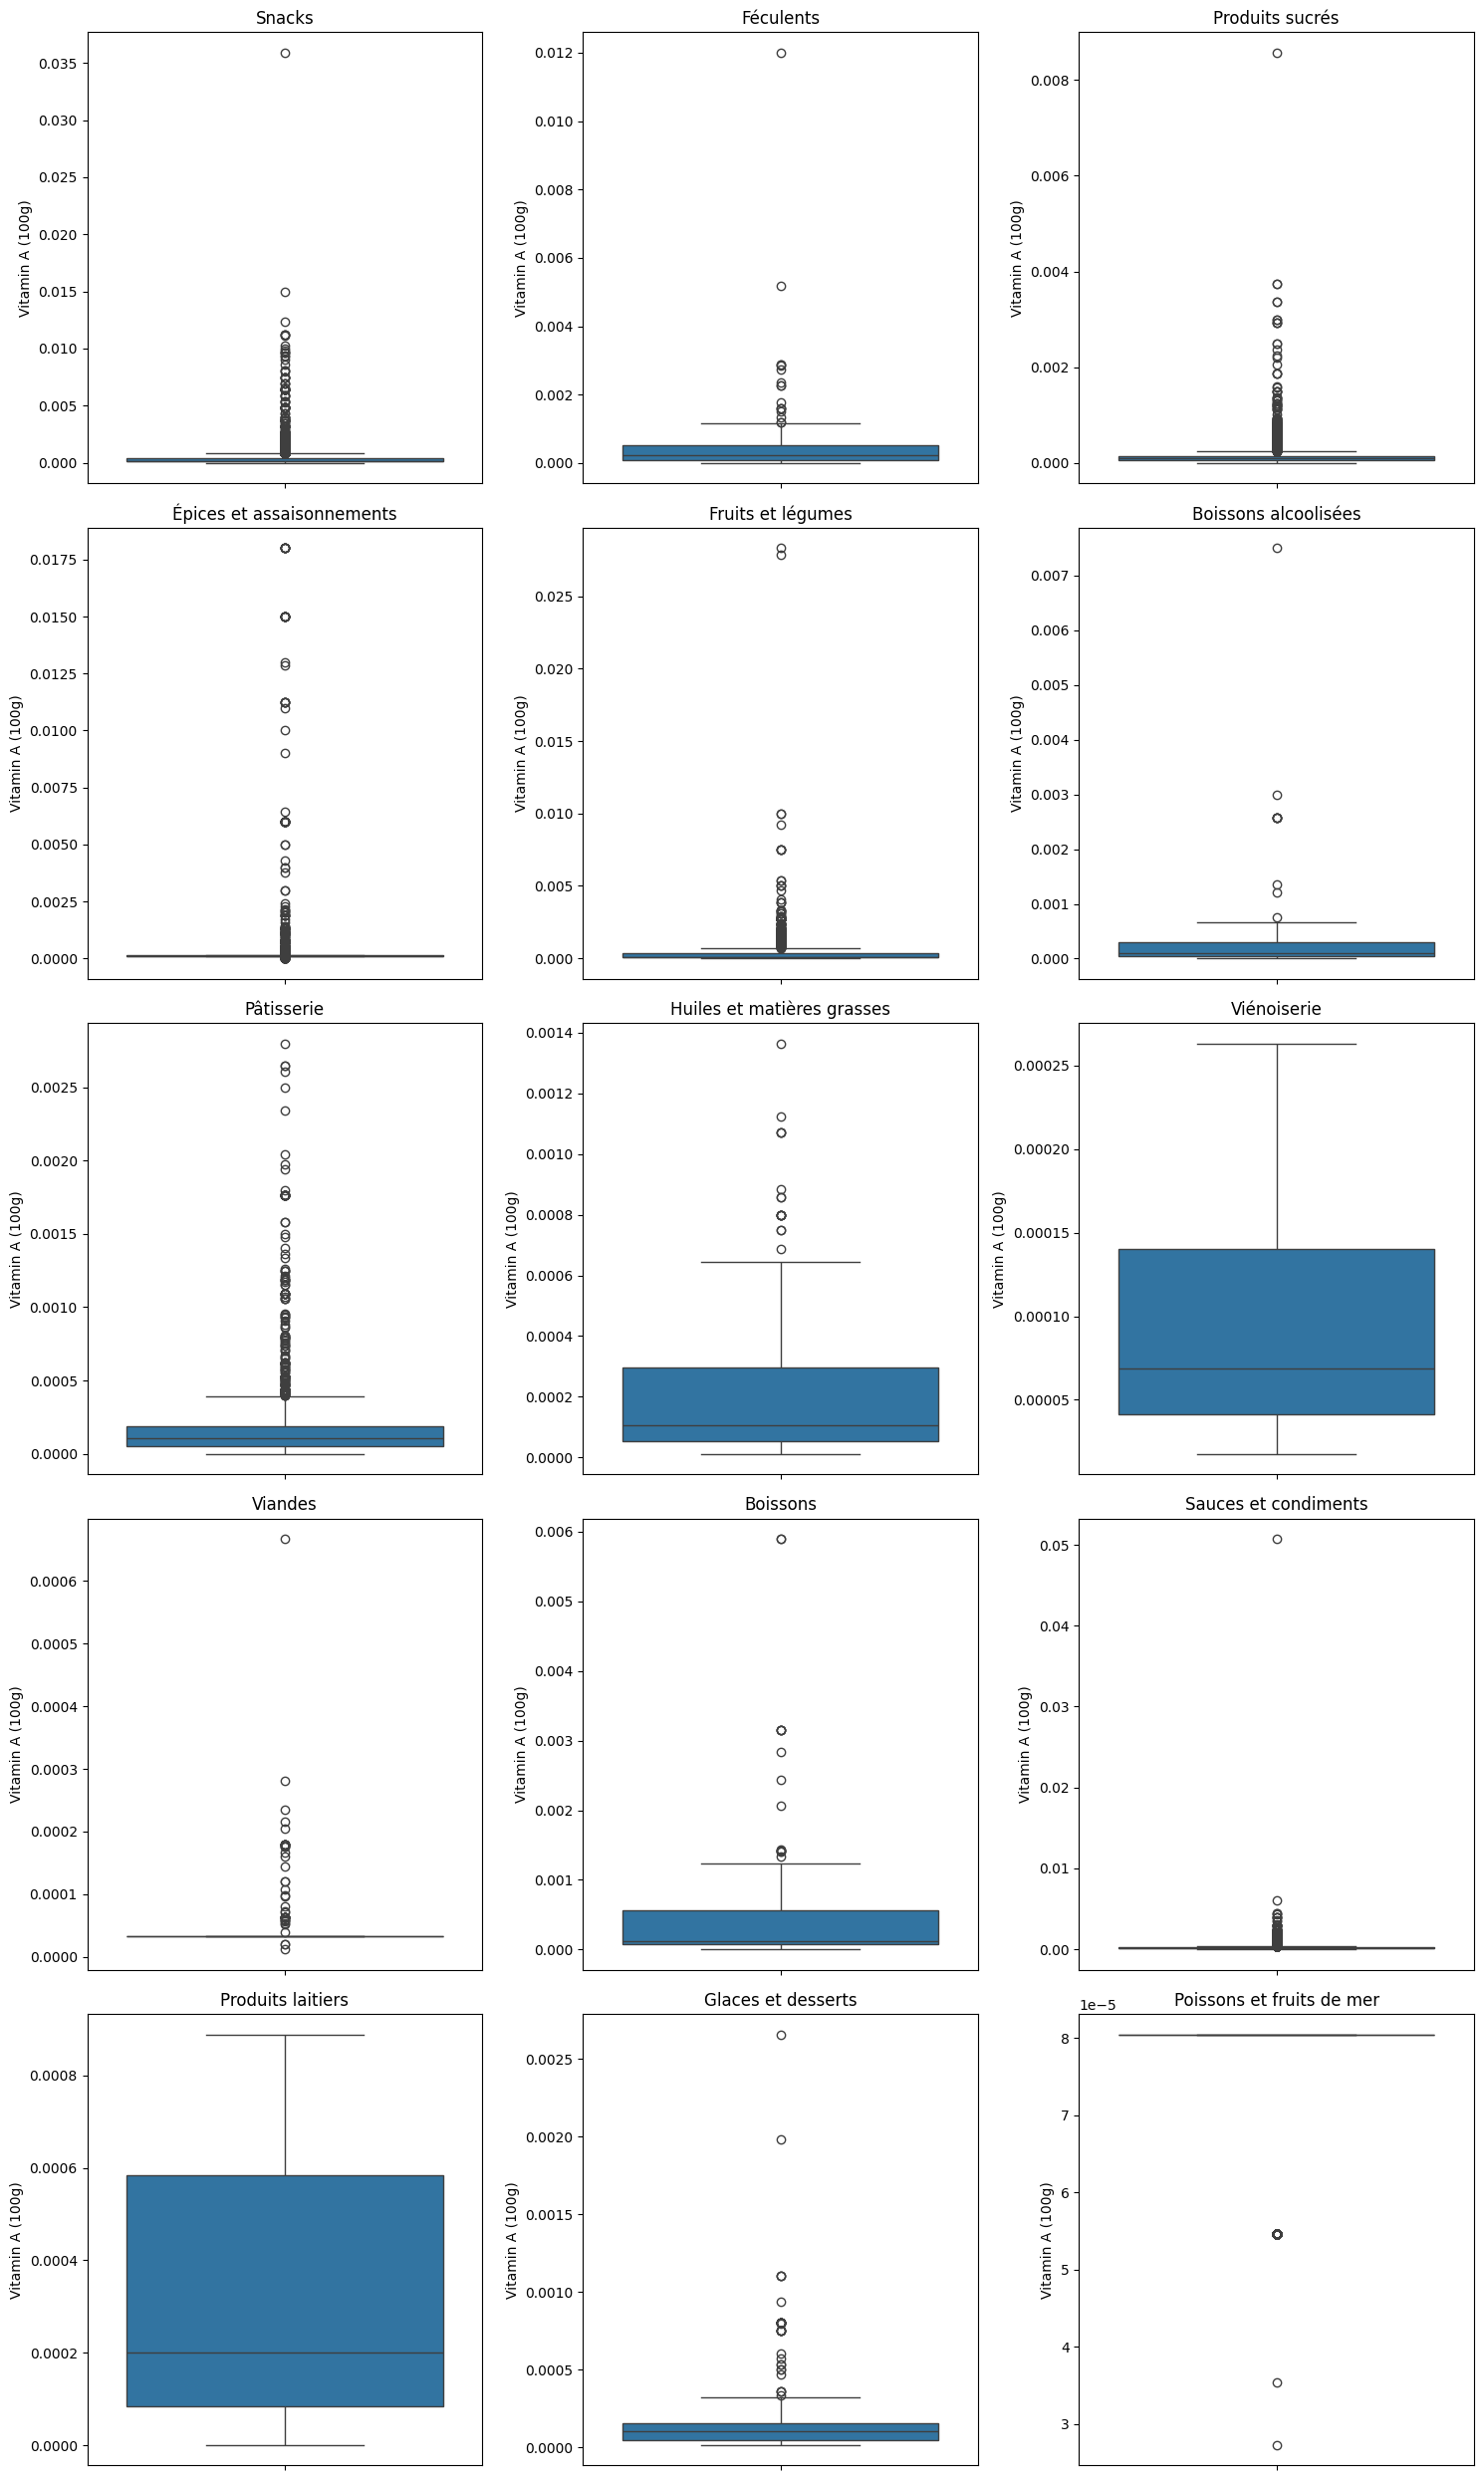

In [134]:
categories = df['categories_fr'].unique()

# Configuration des sous-graphiques
columns_per_row = 3
num_rows = (len(categories) + columns_per_row - 1) // columns_per_row  # Calcul du nombre de lignes
fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(15, num_rows * 5))
axes = axes.flatten()  # Aplatir les axes pour un accès facile

# Générer les boxplots
for i, category in enumerate(categories):
    # Filtrer les données pour exclure les NaN
    category_data = df[(df['categories_fr'] == category) & (df['vitamin-a_100g'].notna()) & (df['vitamin-a_100g'] != 0)]
    
    if not category_data.empty:
        sns.boxplot(
            data=category_data, 
            y='vitamin-a_100g', 
            ax=axes[i]
        )
        axes[i].set_title(category)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('Vitamin A (100g)')
    else:
        axes[i].set_visible(False)  

for j in range(len(categories), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [135]:
df.to_csv('./Dataset/df_nettoye.csv', index=False, encoding='utf-8')

On crée un fichier CSV contenant le DataFrame nettoyé et enrichi avec les colonnes nutritionnelles et les catégories.